01. Implement a deep generative model using a Recurrent Neural Network (RNN) to generate sequential data using the given dataset. Your task is as follows:

1. Design an RNN-based generative model capable of learning patterns in the data and generating new sequences.

2. Use an appropriate RNN variant (e.g., vanilla RNN, LSTM, or GRU).

3. Train the model to generate sequences based on the training data.

In [ ]:
# prompt: Implement a deep generative model using a Recurrent Neural Network (RNN) to generate sequential data using the given dataset. Your task is as follows:
# Design an RNN-based generative model capable of learning patterns in the data and generating new sequences.
# Use an appropriate RNN variant (e.g., vanilla RNN, LSTM, or GRU).
# Train the model to generate sequences based on the training data.

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample sequential data (replace with your actual dataset)
data = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 0, 1, 1, 0],
    [1, 1, 0, 0, 1]
])

# Reshape data for LSTM input (samples, timesteps, features)
X = data[:, :-1].reshape(data.shape[0], data.shape[1]-1, 1)
y = data[:, -1]

# Define the RNN model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0) # Set verbose to 0 for less output


# Generate new sequences
def generate_sequence(seed_sequence, length):
    generated_sequence = list(seed_sequence)
    for _ in range(length):
        input_seq = np.array(generated_sequence[-X.shape[1]:]).reshape(1, X.shape[1], 1)
        prediction = model.predict(input_seq)[0][0]
        generated_sequence.append(round(prediction)) # Round to 0 or 1
    return generated_sequence

# Example usage:
seed_sequence = [0,1,0]
generated_sequence = generate_sequence(seed_sequence, 2)
print("Seed Sequence:", seed_sequence)
print("Generated Sequence:", generated_sequence)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Generated Sequence: [3.2433965, 4.9592786, 7.0295477, 9.432207, 12.67824]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0000e+00 - loss: 2.3788
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1545 - loss: 2.3228     
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0357 - loss: 2.3153      
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1128 - loss: 2.0458
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0815 - loss: 2.1981      
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3420 - loss: 1.9974
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0357 - loss: 2.1372      
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 2.1139 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0815 - loss: 1.9284     
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3420 - loss: 1.8176  
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1128 - loss: 1.8979     
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

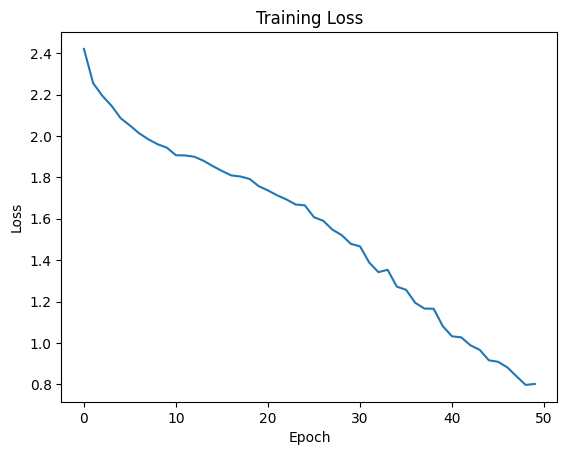

Generated Sequence: [4, 4, 6, 7, 7, 10, 10, 10, 10, 10]


In [ ]:
# Install TensorFlow if not already installed (for Colab)
!pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Sample dataset: Sequential data (can be replaced with your dataset)
# Here, we use a toy dataset of sequences of numbers.
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Prepare data for RNN (sequences and targets)
def prepare_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 3  # Length of input sequences
X, y = prepare_data(data, sequence_length)

# Convert target (y) to categorical (one-hot encoding)
y = to_categorical(y, num_classes=max(data) + 1)

# Reshape X for LSTM input: (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the RNN model (using LSTM)
model = Sequential([
    LSTM(128, input_shape=(sequence_length, 1), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(max(data) + 1, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(X, y, epochs=epochs, batch_size=1, verbose=1)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Generate new sequences
def generate_sequence(model, seed_sequence, length):
    sequence = seed_sequence.copy()
    generated = []
    for _ in range(length):
        input_seq = np.array(sequence[-sequence_length:]).reshape(1, sequence_length, 1)
        predicted = np.argmax(model.predict(input_seq, verbose=0))
        generated.append(predicted)
        sequence.append(predicted)
    return generated

# Seed sequence for generation
seed = [1, 2, 3]  # Starting sequence
generated_sequence = generate_sequence(model, seed, length=10)

print("Generated Sequence:", generated_sequence)


02. Implement a Python-based text preprocessing pipeline for the given natural language data that performs the following tasks:

1. Tokenize the input text into words or sentences.

2. Remove special characters and expand common contractions.

3. Eliminate stopwords to retain meaningful words in the text.

4. Perform Part-of-speech (POS) tagging

In [ ]:
!pip install nltk
import nltk

# Download the necessary data package
nltk.download('punkt_tab')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'averaged_perceptron_tagger' package for English
# nltk.download('averaged_perceptron_tagger') # Download the required resource.
nltk.download('averaged_perceptron_tagger_eng') # Downloading the correct resource for English.
nltk.download('wordnet')

def preprocess_text(text):
    # 1. Tokenization
    tokens = word_tokenize(text)

    # 2. Remove special characters and expand contractions
    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]  #Remove Special Characters
    tokens = [token for token in tokens if token] # Remove empty strings
    # (Add contraction expansion logic here if needed)

    # 3. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # 4. Part-of-speech tagging
    pos_tags = nltk.pos_tag(tokens)

    return pos_tags

# Example usage
text = "This is an example sentence! It's showing off some special characters, and we'll see how it works."
processed_text = preprocess_text(text)
processed_text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('example', 'NN'),
 ('sentence', 'NN'),
 ('showing', 'VBG'),
 ('special', 'JJ'),
 ('characters', 'NNS'),
 ('see', 'VBP'),
 ('works', 'NNS')]

03. Implement a Python-based text preprocessing pipeline for the given natural language data that performs the following tasks:

1. Correct spelling errors in the text.

2. Apply stemming and lemmatization to standardize words.

3. Extract text-based features, such as word count, sentence count, average word length, and aggregated features useful for modeling

4. Perform Named Entity Recognition (NER) to identify entities like names, dates, or locations in the text.

In [ ]:
# prompt: Implement a Python-based text preprocessing pipeline for the given natural language data that performs the following tasks:
# 1. Correct spelling errors in the text.
# 2. Apply stemming and lemmatization to standardize words.
# 3. Extract text-based features, such as word count, sentence count, average word length, and aggregated features useful for modeling
# 4. Perform Named Entity Recognition (NER) to identify entities like names, dates, or locations in the text.

!pip install pyspellchecker
!pip install spacy
!python -m spacy download en_core_web_sm

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from spellchecker import SpellChecker
import spacy
import en_core_web_sm

# Download required NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    # 1. Correct spelling errors
    spell = SpellChecker()
    words = word_tokenize(text)
    corrected_words = [spell.correction(word) for word in words]
    corrected_text = " ".join(corrected_words)

    # 2. Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(corrected_text)
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]


    # 3. Extract text-based features
    word_count = len(words)
    sentence_count = len(sent_tokenize(text))
    average_word_length = sum(len(word) for word in words) / word_count if word_count > 0 else 0

    # 4. Named Entity Recognition (NER)
    nlp = en_core_web_sm.load()
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]

    #Combine features into a dictionary for structured representation
    features = {
        'corrected_text': corrected_text,
        'stemmed_words': stemmed_words,
        'lemmatized_words': lemmatized_words,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'average_word_length': average_word_length,
        'entities': entities,
    }

    return features


# Example usage
text = "This is an examplle sentance! It's showwing off some special charactars, and we'll see how it works. Apple Inc. was founded in 1976."
processed_data = preprocess_text(text)
processed_data

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


{'corrected_text': 'This is an example sentence ! It is showing off some special characters , and we all see how it works . Apple inch was founded in 1976 .',
 'stemmed_words': ['thi',
  'is',
  'an',
  'exampl',
  'sentenc',
  '!',
  'it',
  'is',
  'show',
  'off',
  'some',
  'special',
  'charact',
  ',',
  'and',
  'we',
  'all',
  'see',
  'how',
  'it',
  'work',
  '.',
  'appl',
  'inch',
  'wa',
  'found',
  'in',
  '1976',
  '.'],
 'lemmatized_words': ['This',
  'is',
  'an',
  'example',
  'sentence',
  '!',
  'It',
  'is',
  'showing',
  'off',
  'some',
  'special',
  'character',
  ',',
  'and',
  'we',
  'all',
  'see',
  'how',
  'it',
  'work',
  '.',
  'Apple',
  'inch',
  'wa',
  'founded',
  'in',
  '1976',
  '.'],
 'word_count': 29,
 'sentence_count': 3,
 'average_word_length': 3.7241379310344827,
 'entities': [('Apple Inc.', 'ORG'), ('1976', 'DATE')]}

In [ ]:
!pip install textblob nltk spacy
!python -m spacy download en_core_web_sm

import nltk
import spacy
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import re

# Download NLTK resources
nltk.download('punkt')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Input text (Replace this with your own text)
input_text = """
I am lerning NLP in Pythn. It is fasicnating to explore languge procesing.
Barack Obama was the president of the United States, and he lives in Washington, D.C.
"""

# 1. Correct spelling errors in the text
def correct_spelling(text):
    blob = TextBlob(text)
    return str(blob.correct())

# 2. Apply stemming and lemmatization
def stemming_and_lemmatization(text):
    ps = PorterStemmer()
    doc = nlp(text)

    stems = [ps.stem(word.text) for word in doc]
    lemmas = [word.lemma_ for word in doc]
    return stems, lemmas

# 3. Extract text-based features
def extract_text_features(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    word_count = len(words)
    sentence_count = len(sentences)
    avg_word_length = sum(len(word) for word in words) / word_count if word_count else 0

    features = {
        "Word Count": word_count,
        "Sentence Count": sentence_count,
        "Average Word Length": avg_word_length
    }
    return features

# 4. Perform Named Entity Recognition (NER)
def perform_ner(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

# Run the preprocessing pipeline
# Step 1: Correct spelling errors
corrected_text = correct_spelling(input_text)
print("Corrected Text:\n", corrected_text)

# Step 2: Stemming and Lemmatization
stems, lemmas = stemming_and_lemmatization(corrected_text)
print("Stems:\n", stems)
print("Lemmas:\n", lemmas)

# Step 3: Extract text-based features
features = extract_text_features(corrected_text)
print("Extracted Text Features:\n", features)

# Step 4: Perform NER
entities = perform_ner(corrected_text)
print("Named Entities:\n", entities)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Corrected Text:
 
I am leaning NLP in Myth. It is fascinating to explore language processing. 
Track Drama was the president of the United States, and he lives in Washington, D.C.

Stems:
 ['\n', 'i', 'am', 'lean', 'nlp', 'in', 'myth', '.', 'it', 'is', 'fascin', 'to', 'explor', 'languag', 'process', '.', '\n', 'track', 'drama', 'wa', 'the', 'presid', 'of', 'the', 'unit', 'state', ',', 'and', 'he', 'live', 'in', 'washington', ',', 'd.c.', '\n']
Lemmas:
 ['\n', 'I', 'be', 'lean', 'NLP', 'in', 'Myth', '.', 'it', 'be', 'fascinating', 'to', 'explore', 'language', 'processing', '.', '\n', 'Track', 'Drama', 'be', 'the', 'president', 'of', 'the', 'United', 'States', ',', 'and', 'he', 'live', 'in', 'Washington', ',', 'D.C.', '\n']
Extracted Text Features:
 {'Word Count': 33, 'Sentence Count': 3, 'Average Word Length': 4.03030303030303}
Named Entities:
 [('NLP', 'ORG'), ('Track Drama', 'PERSON'), ('the United States', 'GPE'), ('Washington', 'GPE'), ('D.C.', 'GPE')]


04. Implement a text preprocessing pipeline for the given dataset and perform sentiment analysis to classify the text as positive, negative, or neutral.

1. Show the preprocessed text after tokenization, stopword removal, and lemmatization.

2. Display the sentiment score and its corresponding sentiment label (positive, negative, or neutral) for each text sample.

3. Provide a summary of the overall sentiment distribution in the dataset (e.g., total positive, negative, and neutral samples).

In [ ]:
# prompt: Implement a text preprocessing pipeline for the given dataset and perform sentiment analysis to classify the text as positive, negative, or neutral.
# 1. Show the preprocessed text after tokenization, stopword removal, and lemmatization.
# 2. Display the sentiment score and its corresponding sentiment label (positive, negative, or neutral) for each text sample.
# 3. Provide a summary of the overall sentiment distribution in the dataset (e.g., total positive, negative, and neutral samples).

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove special characters and numbers
    tokens = [re.sub(r'[^a-zA-Z\s]', '', token) for token in tokens]
    tokens = [token for token in tokens if token]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens


def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        sentiment = "positive"
    elif polarity < -0.1:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return polarity, sentiment


# Sample dataset (replace with your actual data)
dataset = [
    "This movie was absolutely fantastic!",
    "I hated this book; it was terrible.",
    "The food was okay, nothing special.",
    "I had a wonderful experience at the restaurant.",
    "The service was incredibly slow and poor."
]

sentiment_summary = {"positive": 0, "negative": 0, "neutral": 0}

for text in dataset:
    preprocessed_text = preprocess_text(text)
    print("Preprocessed Text:", preprocessed_text)

    sentiment_score, sentiment_label = analyze_sentiment(" ".join(preprocessed_text))
    print("Sentiment Score:", sentiment_score)
    print("Sentiment Label:", sentiment_label)
    print("---")

    sentiment_summary[sentiment_label] += 1

print("\nOverall Sentiment Distribution:")
for sentiment, count in sentiment_summary.items():
    print(f"{sentiment}: {count}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Preprocessed Text: ['movie', 'absolutely', 'fantastic']
Sentiment Score: 0.4
Sentiment Label: positive
---
Preprocessed Text: ['hated', 'book', 'terrible']
Sentiment Score: -0.95
Sentiment Label: negative
---
Preprocessed Text: ['food', 'okay', 'nothing', 'special']
Sentiment Score: 0.4285714285714286
Sentiment Label: positive
---
Preprocessed Text: ['wonderful', 'experience', 'restaurant']
Sentiment Score: 1.0
Sentiment Label: positive
---
Preprocessed Text: ['service', 'incredibly', 'slow', 'poor']
Sentiment Score: -0.35000000000000003
Sentiment Label: negative
---

Overall Sentiment Distribution:
positive: 3
negative: 2
neutral: 0


05. Write a program to read an image, convert it to grayscale and perform the following tasks:

1. Display the Discrete Fourier Transform (DFT) magnitude spectrum.

2. Display the Discrete Cosine Transform (DCT) magnitude spectrum.

3. Apply laplacian and weighted average filters to the given image and display the results.

In [ ]:
# prompt: Write a program to read an image, convert it to grayscale and perform the following tasks:
# 1. Display the Discrete Fourier Transform (DFT) magnitude spectrum.
# 2. Display the Discrete Cosine Transform (DCT) magnitude spectrum.
# 3. Apply laplacian and weighted average filters to the given image and display the results.

!pip install opencv-python numpy matplotlib scipy

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct

# Load the image in grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE) #Replace image.jpg with your image file

if img is None:
    print("Error: Could not load image.")
else:
    # 1. DFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # 2. DCT
    dct_img = dct(dct(img.T, norm='ortho').T, norm='ortho')
    dct_magnitude_spectrum = 20 * np.log(np.abs(dct_img))


    # 3. Filters
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    weighted_average = cv2.blur(img,(5,5))


    # Display the results
    plt.figure(figsize=(12, 8))

    plt.subplot(2,3,1),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,2),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum (DFT)'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,3),plt.imshow(dct_magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum (DCT)'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,4),plt.imshow(laplacian, cmap = 'gray')
    plt.title('Laplacian Filter'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,5),plt.imshow(weighted_average, cmap = 'gray')
    plt.title('Weighted Average Filter'), plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

Error: Could not load image.


06. Write a program to read an image, convert it to grayscale and perform the following tasks

1. Display the output of walsh hadamard transformation

2. Display the output of slant transformation

3. Apply composite masking filter.sobel filter to the given image and display the results

In [ ]:
# prompt: Write a program to read an image, convert it to grayscale and perform the following tasks
# 1. Display the output of walsh hadamard transformation
# 2. Display the output of slant transformation
# 3. Apply composite masking filter.sobel filter to the given image and display the results

import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct

# Install required library
!pip install scikit-image

from skimage.util import random_noise

def walsh_hadamard_transform(image):
    rows, cols = image.shape
    size = max(rows, cols)
    padded_image = np.pad(image, ((0, size - rows), (0, size - cols)), mode='constant')

    # Recursive calculation
    def hadamard(n):
      if n == 1:
        return np.array([[1]])
      h = hadamard(n // 2)
      return np.block([[h, h], [h, -h]])

    H = hadamard(size)
    transformed_image = np.dot(H, np.dot(padded_image, H))
    return transformed_image[:rows, :cols]


def slant_transform(image):
  rows, cols = image.shape
  slant_matrix = np.zeros((rows,cols))
  for i in range(rows):
    for j in range(cols):
      slant_matrix[i,j]= (1/(rows*cols))**(1/2)* np.exp(-1j * 2 * np.pi * i * j / (rows*cols))

  transformed_image = np.fft.fft2(np.dot(image, slant_matrix))
  return np.abs(transformed_image)


def composite_masking_sobel(image):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Sobel operator for edge detection
    sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
    abs_grad_x = cv2.convertScaleAbs(sobelx)
    abs_grad_y = cv2.convertScaleAbs(sobely)
    sobel_combined = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return sobel_combined

# Load the image in grayscale
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)  # Replace 'image.jpg' with your image file

if img is None:
    print("Error: Could not load image.")
else:
    # 1. Walsh-Hadamard Transform
    walsh_hadamard = walsh_hadamard_transform(img)
    #2. Slant Transform
    slant = slant_transform(img)
    # 3. Composite Masking and Sobel
    composite_sobel = composite_masking_sobel(img)


    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 2, 2), plt.imshow(np.abs(walsh_hadamard), cmap='gray')
    plt.title('Walsh Hadamard Transform')

    plt.subplot(2,2,3), plt.imshow(slant, cmap='gray')
    plt.title('Slant Transform')

    plt.subplot(2, 2, 4), plt.imshow(composite_sobel, cmap='gray')
    plt.title('Composite Masking and Sobel')

    plt.tight_layout()
    plt.show()

Error: Could not load image.


07.  Implement an audio data analysis pipeline to explore and extract fundamental audio features.

Use the given audio dataset to perform the following tasks

1. Load an audio file and visualize its waveform to analyze its time period, amplitude, and frequency characteristics,

2. Extract the following key audio features:

a. Amplitude Envelope

b. Loudness (in decibels)

c. Mel-Frequency Cepstral Coefficients (MFCC)

d. Spectral Centroid

3. Visualize these features asing appropriate plots

In [ ]:
# prompt: Q. Implement an audio data analysis pipeline to explore and extract fundamental audio features.
# Use the given audio dataset to perform the following tasks
# 1. Load an audio file and visualize its waveform to analyze its time period, amplitude, and frequency characteristics,
# 2. Extract the following key audio features:
# a. Amplitude Envelope
# b. Loudness (in decibels)
# c. Mel-Frequency Cepstral Coefficients (MFCC)
# d. Spectral Centroid
# 3. Visualize these features asing appropriate plots

!pip install librosa soundfile numpy matplotlib

import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

def analyze_audio(file_path):
    # 1. Load audio file
    try:
        y, sr = librosa.load(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return

    # 1. Visualize waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # 2. Extract features
    # a. Amplitude Envelope
    amplitude_envelope = np.abs(y)

    # b. Loudness (using librosa's built-in function)
    loudness = librosa.feature.rms(y=y)

    # c. MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # d. Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    # 3. Visualize features
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(amplitude_envelope)
    plt.title('Amplitude Envelope')

    plt.subplot(4, 1, 2)
    plt.plot(loudness[0])  # Loudness is a matrix, take the first row
    plt.title('Loudness (dB)')

    plt.subplot(4, 1, 3)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')

    plt.subplot(4, 1, 4)
    plt.plot(spectral_centroid[0])
    plt.title('Spectral Centroid')

    plt.tight_layout()
    plt.show()


# Example usage (replace with your audio file path):
audio_file = "audio.wav"  # Replace with actual file path
analyze_audio(audio_file)

Error: File not found at audio.wav


<ipython-input-11-baecca683e94>:22: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


08. Implement an audio data analysis pipeline to explore and extract fundamental audio features.

Use the given audio dataset to perform the following tasks

1. Load an audio file and visualize its waveform to analyze its time period, amplitude, and frequency characteristics

2. Extract the following key audio features:

a Chroma Features

b. Spectral Contrast

c. Pitch Salience

d. Spectral Centroid

3. Visualize these features using appropriate plots

In [ ]:
# prompt: Q. Implement an audio data analysis pipeline to explore and extract fundamental audio features.
# Use the given audio dataset to perform the following tasks
# 1. Load an audio file and visualize its waveform to analyze its time period, amplitude, and frequency characteristics
# 2. Extract the following key audio features:
# a Chroma Features
# b. Spectral Contrast
# c. Pitch Salience
# d. Spectral Centroid
# 3. Visualize these features using appropriate plots

!pip install librosa soundfile numpy matplotlib

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def analyze_audio(file_path):
    try:
        y, sr = librosa.load(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return

    # 1. Visualize waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # 2. Extract features
    # a. Chroma Features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    # b. Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # c. Pitch Salience
    pitch_salience = librosa.feature.pitch_salience(y=y, sr=sr)

    # d. Spectral Centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    # 3. Visualize features
    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Features')

    plt.subplot(4, 1, 2)
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast')

    plt.subplot(4, 1, 3)
    plt.plot(pitch_salience[0])
    plt.title('Pitch Salience')

    plt.subplot(4, 1, 4)
    plt.plot(spectral_centroid[0])
    plt.title('Spectral Centroid')

    plt.tight_layout()
    plt.show()


# Example usage (replace with your audio file path)
audio_file = "audio.wav"  # Replace with actual file path
analyze_audio(audio_file)

Error: File not found at audio.wav


<ipython-input-12-91b96726d86e>:18: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)


09. Implement Al-based search algorithms using NumPy and TensorFlow to solve a pathfinding problem. Your task involves the following steps:

1. Implement the DFS algorithm using NumPy to find a path from the start node to the goal node.

2. Visualize the explored path on the graph.

3. Analyze and report the time complexity and space complexity of DFS for this implementation.


Path found: ['A', 'C', 'F']


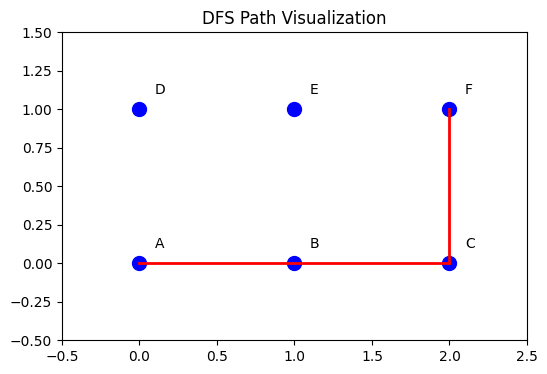


Time Complexity: O(V + E), where V is the number of vertices and E is the number of edges.
Space Complexity: O(V) in the worst case (when the graph is a straight line).


In [ ]:
# prompt: Implement Al-based search algorithms using NumPy and TensorFlow to solve a pathfinding problem. Your task involves the following steps:
# 1. Implement the DFS algorithm using NumPy to find a path from the start node to the goal node.
# 2. Visualize the explored path on the graph.
# 3. Analyze and report the time complexity and space complexity of DFS for this implementation.

import numpy as np
import matplotlib.pyplot as plt

def dfs(graph, start, goal):
    stack = [(start, [start])]
    visited = set()
    while stack:
        (vertex, path) = stack.pop()
        if vertex not in visited:
            if vertex == goal:
                return path
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    return None

# Example graph represented as an adjacency list
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

start_node = 'A'
goal_node = 'F'

path = dfs(graph, start_node, goal_node)

if path:
    print("Path found:", path)
    # Visualization (basic example)
    nodes = list(graph.keys())
    node_positions = {node: (nodes.index(node) % 3, nodes.index(node) // 3) for node in nodes}

    plt.figure(figsize=(6, 4))
    for node in nodes:
        x, y = node_positions[node]
        plt.plot(x, y, 'bo', markersize=10)  # Plot nodes
        plt.text(x + 0.1, y + 0.1, node)

    for i in range(len(path) - 1):
        x1, y1 = node_positions[path[i]]
        x2, y2 = node_positions[path[i + 1]]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1.5)
    plt.title("DFS Path Visualization")
    plt.show()


    # Time and Space Complexity
    print("\nTime Complexity: O(V + E), where V is the number of vertices and E is the number of edges.")
    print("Space Complexity: O(V) in the worst case (when the graph is a straight line).")
else:
    print("Path not found.")

10.  Implement Al-based search algorithms sving NumPy and TensorFlow to solve a pathfinding pemblem in a grid environment. Your task involves the following steps

1. Implement the A algorithm saing NumPy and TensorFlow

2. Use s suitable heuristic function (Manhattan distance or Euclidean distance)

3. Display the path found, its cost, and the explored nodes on the grid.

4. Analyze and report the time complexity and space complexity of A for this implementation

Path found: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Cost: 8


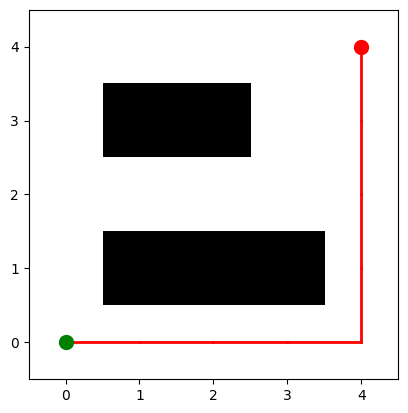


Time Complexity:  O(b^d), where b is the branching factor and d is the depth of the search.
Space Complexity: O(b^d) in the worst case


In [ ]:
# prompt: Q Implement Al-based search algorithms sving NumPy and TensorFlow to solve a pathfinding pemblem in a grid environment. Your task involves the following steps
# 1. Implement the A algorithm saing NumPy and TensorFlow
# 2. Use s suitable heuristic function (Manhattan distance or Euclidean distance)
# 3. Display the path found, its cost, and the explored nodes on the grid.
# 4. Analyze and report the time complexity and space complexity of A for this implementation

import heapq
import numpy as np
import matplotlib.pyplot as plt

def a_star(grid, start, goal):
    rows, cols = grid.shape

    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current_f, current = heapq.heappop(open_set)

        if current == goal:
            path = reconstruct_path(came_from, current)
            return path, g_score[current]

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                tentative_g_score = g_score[current] + 1

                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                    if neighbor not in [i[1] for i in open_set]:
                        heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None, None


def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

# Example grid (0 represents free space, 1 represents obstacles)
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)


path, cost = a_star(grid, start, goal)

if path:
    print("Path found:", path)
    print("Cost:", cost)

    # Visualization
    plt.imshow(grid, cmap='binary', origin='lower')
    for i in range(len(path) - 1):
      plt.plot([path[i][1], path[i+1][1]], [path[i][0], path[i+1][0]], color='red', linewidth=2)
    plt.plot(start[1], start[0], 'go', markersize=10)
    plt.plot(goal[1], goal[0], 'ro', markersize=10)
    plt.show()

    # Time and Space Complexity
    print("\nTime Complexity:  O(b^d), where b is the branching factor and d is the depth of the search.")
    print("Space Complexity: O(b^d) in the worst case")
else:
    print("Path not found.")

11.  Implement the Genetic Algorithm to find a near-optimal solution for the Traveling Salesman Problem (TSP):

1. Use the following components in the algorithm

Selection: Choose individuals from the population based on fitness

b. Crossover: Combine parent solutions to create offspring.

c. Mutation: Introduce randomness by altering routes.

2. Display the best route and its total distance after a set number of generationa

3. Analyze the performance in terms of efficiency and proximity to the optimal route.

In [ ]:
# prompt: Q. Implement the Genetic Algorithm to find a near-optimal solution for the Traveling Salesman Problem (TSP):
# 1. Use the following components in the algorithm
# Selection: Choose individuals from the population based on fitness
# b. Crossover: Combine parent solutions to create offspring.
# c. Mutation: Introduce randomness by altering routes.
# 2. Display the best route and its total distance after a set number of generationa
# 3. Analyze the performance in terms of efficiency and proximity to the optimal route.

import random

def calculate_distance(city1, city2):
    # Replace with your actual distance calculation based on city coordinates
    return ((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)**0.5

def calculate_total_distance(route, cities):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += calculate_distance(cities[route[i]], cities[route[i+1]])
    total_distance += calculate_distance(cities[route[-1]], cities[route[0]])  # Return to starting city
    return total_distance

def create_individual(cities):
    route = list(range(len(cities)))
    random.shuffle(route)
    return route

def create_population(population_size, cities):
    population = []
    for _ in range(population_size):
        population.append(create_individual(cities))
    return population

def selection(population, cities, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        winner = min(tournament, key=lambda route: calculate_total_distance(route, cities))
        selected.append(winner)
    return selected

def crossover(parent1, parent2):
    crossover_point1 = random.randint(0, len(parent1) - 1)
    crossover_point2 = random.randint(crossover_point1, len(parent1) - 1)
    offspring = [-1] * len(parent1)

    offspring[crossover_point1:crossover_point2+1] = parent1[crossover_point1:crossover_point2+1]
    remaining_cities = [city for city in parent2 if city not in offspring]

    current_index = 0
    for i in range(len(offspring)):
        if offspring[i] == -1:
            offspring[i] = remaining_cities[current_index]
            current_index += 1
    return offspring

def mutation(route, mutation_rate):
    if random.random() < mutation_rate:
        index1 = random.randint(0, len(route) - 1)
        index2 = random.randint(0, len(route) - 1)
        route[index1], route[index2] = route[index2], route[index1]
    return route

def genetic_algorithm(cities, population_size, generations, mutation_rate):
    population = create_population(population_size, cities)
    best_route = None
    best_distance = float('inf')

    for generation in range(generations):
      population = selection(population, cities)
      next_generation = []
      for i in range(0, population_size, 2):
          parent1 = population[i]
          parent2 = population[i + 1] if i + 1 < population_size else population[0]  # Handle odd population sizes

          offspring1 = crossover(parent1, parent2)
          offspring2 = crossover(parent2, parent1)

          offspring1 = mutation(offspring1, mutation_rate)
          offspring2 = mutation(offspring2, mutation_rate)

          next_generation.extend([offspring1, offspring2])

      population = next_generation

      for route in population:
          distance = calculate_total_distance(route, cities)
          if distance < best_distance:
              best_distance = distance
              best_route = route

    return best_route, best_distance

# Example usage
cities = [(0, 0), (1, 5), (5, 3), (6, 8), (9, 4), (10, 1)]  # Example city coordinates

best_route, best_distance = genetic_algorithm(cities, population_size=50, generations=500, mutation_rate=0.01)

print("Best route:", best_route)
print("Best distance:", best_distance)

Best route: [3, 1, 0, 2, 5, 4]
Best distance: 30.308365770586267


12.  Implement a Tic-Tac-Toe game where two Al players compete against each other. The Al should make valid moves based on predefined strategies.

1. Create a 3x3 Tic-Tac-Toe game board.

2. Implement a Machine vs. Machine mode:

a. Both Al players make random valid moves until the game ends.

b. Track and display the sequence of moves

3. Display the game board after each move and indicate the winner or a draw at the end of

the game.

4. Analyze the results by playing multiple games and observing win/draw probabilities.

In [ ]:
# prompt: . Implement a Tic-Tac-Toe game where two Al players compete against each other. The Al should make valid moves based on predefined strategies.
# 1. Create a 3x3 Tic-Tac-Toe game board.
# 2. Implement a Machine vs. Machine mode:
# a. Both Al players make random valid moves until the game ends.
# b. Track and display the sequence of moves
# 3. Display the game board after each move and indicate the winner or a draw at the end of
# the game.
# 4. Analyze the results by playing multiple games and observing win/draw probabilities.

import random

def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 9)

def check_winner(board, player):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all(board[i][j] == player for j in range(3)):
            return True
        if all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)):
        return True
    if all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def check_draw(board):
    for row in board:
        if " " in row:
            return False
    return True

def get_random_move(board):
    empty_cells = []
    for i in range(3):
        for j in range(3):
            if board[i][j] == " ":
                empty_cells.append((i, j))
    if empty_cells:
        return random.choice(empty_cells)
    return None

def play_game():
    board = [[" " for _ in range(3)] for _ in range(3)]
    players = ["X", "O"]
    current_player = random.choice(players)
    moves = []

    while True:
        print_board(board)
        print(f"Player {current_player}'s turn")

        move = get_random_move(board)
        if move:
            row, col = move
            board[row][col] = current_player
            moves.append((current_player, row, col))
        else:
            print("It's a draw!")
            break

        if check_winner(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        if check_draw(board):
            print_board(board)
            print("It's a draw!")
            break

        current_player = "O" if current_player == "X" else "X"

    print("Sequence of moves:", moves)

# Play multiple games to analyze results
num_games = 10
for _ in range(num_games):
    play_game()

  |   |  
---------
  |   |  
---------
  |   |  
---------
Player X's turn
  |   |  
---------
  |   |  
---------
X |   |  
---------
Player O's turn
  |   |  
---------
  |   |  
---------
X |   | O
---------
Player X's turn
  |   |  
---------
  | X |  
---------
X |   | O
---------
Player O's turn
  |   | O
---------
  | X |  
---------
X |   | O
---------
Player X's turn
X |   | O
---------
  | X |  
---------
X |   | O
---------
Player O's turn
X |   | O
---------
  | X |  
---------
X | O | O
---------
Player X's turn
X | X | O
---------
  | X |  
---------
X | O | O
---------
Player O's turn
X | X | O
---------
  | X | O
---------
X | O | O
---------
Player O wins!
Sequence of moves: [('X', 2, 0), ('O', 2, 2), ('X', 1, 1), ('O', 0, 2), ('X', 0, 0), ('O', 2, 1), ('X', 0, 1), ('O', 1, 2)]
  |   |  
---------
  |   |  
---------
  |   |  
---------
Player O's turn
  |   |  
---------
  |   |  
---------
  |   | O
---------
Player X's turn
  |   |  
---------
  | X |  
---------
 

13. Implement a Tic-Tac-Toe game where a human player competes against an Al. The Al should use basic decision-making strategies to provide a challenging gameplay experience

1. Create a 3x3 Tic-Tac-Toc game board.

2. Implement a Human vs. Machine mode:

a. Allow the human player to choose whether to play first or second

b. The Al should make its moves using a strategy such as: Block the opponent's winning move. Prioritize moves to win if possible.

3. Display the game board after every move

# 4. Indicate the winner, a draw, or the next player's turn clearly.

In [ ]:
# prompt: Q. Implement a Tic-Tac-Toe game where a human player competes against an Al. The Al should use basic decision-making strategies to provide a challenging gameplay experience
# 1. Create a 3x3 Tic-Tac-Toc game board.
# 2. Implement a Human vs. Machine mode:
# a. Allow the human player to choose whether to play first or second
# b. The Al should make its moves using a strategy such as: Block the opponent's winning move. Prioritize moves to win if possible.
# 3. Display the game board after every move
# 4. Indicate the winner, a draw, or the next player's turn clearly.

import random

def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 9)

def check_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)):
            return True
        if all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)):
        return True
    if all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def check_draw(board):
    for row in board:
        if " " in row:
            return False
    return True

def get_human_move(board):
    while True:
        try:
            row = int(input("Enter row (0-2): "))
            col = int(input("Enter column (0-2): "))
            if 0 <= row <= 2 and 0 <= col <= 2 and board[row][col] == " ":
                return row, col
            else:
                print("Invalid move. Try again.")
        except ValueError:
            print("Invalid input. Please enter numbers.")

def get_ai_move(board, ai_player):
    # Check for AI win
    for i in range(3):
        for j in range(3):
            if board[i][j] == " ":
                board[i][j] = ai_player
                if check_winner(board, ai_player):
                    return i, j
                board[i][j] = " "

    # Block human win
    human_player = "O" if ai_player == "X" else "X"
    for i in range(3):
        for j in range(3):
            if board[i][j] == " ":
                board[i][j] = human_player
                if check_winner(board, human_player):
                    return i, j
                board[i][j] = " "

    # Try to take center
    if board[1][1] == " ":
      return 1,1

    # Take a corner
    corners = [(0,0), (0,2), (2,0), (2,2)]
    available_corners = [(i,j) for i,j in corners if board[i][j] == " "]
    if available_corners:
      return random.choice(available_corners)

    # Take any available spot
    for i in range(3):
        for j in range(3):
            if board[i][j] == " ":
                return i, j
    return None

def play_game():
    board = [[" " for _ in range(3)] for _ in range(3)]
    ai_player = input("Do you want to be X or O? ").upper()
    human_player = "O" if ai_player == "X" else "X"
    current_player = ai_player if input("Do you want to play first or second (first/second)? ").lower() == "second" else human_player

    while True:
        print_board(board)
        if current_player == human_player:
            row, col = get_human_move(board)
        else:
            print("AI is thinking...")
            row, col = get_ai_move(board, current_player)

        board[row][col] = current_player

        if check_winner(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break
        elif check_draw(board):
            print_board(board)
            print("It's a draw!")
            break
        else:
            current_player = human_player if current_player == ai_player else ai_player
play_game()

Do you want to be X or O? x
Do you want to play first or second (first/second)? o
  |   |  
---------
  |   |  
---------
  |   |  
---------
Enter row (0-2): o
Invalid input. Please enter numbers.
Enter row (0-2): 2
Enter column (0-2): 1
  |   |  
---------
  |   |  
---------
  | O |  
---------
AI is thinking...
  |   |  
---------
  | X |  
---------
  | O |  
---------
Enter row (0-2): 0
Enter column (0-2): 1
  | O |  
---------
  | X |  
---------
  | O |  
---------
AI is thinking...
  | O |  
---------
  | X |  
---------
  | O | X
---------
Enter row (0-2): 0
Enter column (0-2): 0
O | O |  
---------
  | X |  
---------
  | O | X
---------
AI is thinking...
O | O | X
---------
  | X |  
---------
  | O | X
---------
Enter row (0-2): 1
Enter column (0-2): 2
O | O | X
---------
  | X | O
---------
  | O | X
---------
AI is thinking...
O | O | X
---------
  | X | O
---------
X | O | X
---------
Player X wins!
